In [1]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
# Make some of the relevant imports
import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder

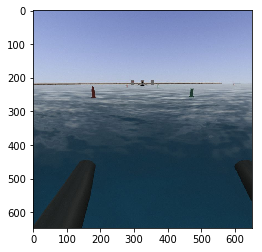

In [2]:
image = mpimg.imread('images/Entrance_gate.png')
plt.imshow(image)

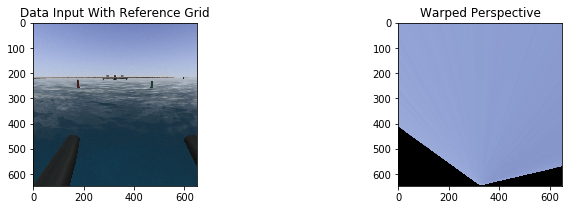

In [6]:
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    mask = cv2.warpPerspective(np.ones_like(img[:,:,0]), M, (img.shape[1], img.shape[0]))
    
    return warped, mask

#set offset
dst_size = 5 
bottom_offset = 6

#set transform range
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

#Transorm
warped, mask = perspect_transform(image, source, destination)

#Plot
fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.title('Data Input With Reference Grid')
plt.imshow(image)
plt.subplot(122)
plt.title('Warped Perspective')
plt.imshow(warped)

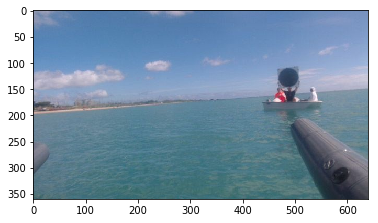

In [9]:
image = cv2.imread('images/500.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

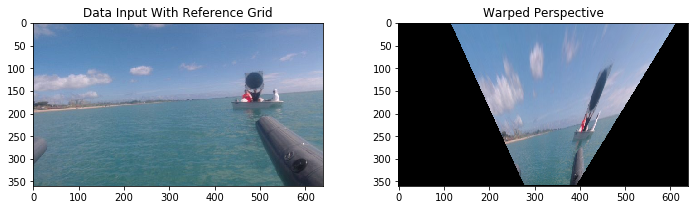

In [21]:
#set offset
dst_size = 40
bottom_offset = 6

#set transform range
source = np.float32([[20, 350], [450 ,350],[375, 205], [125, 205]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

#Transorm
warped, mask = perspect_transform(image, source, destination)

#Plot
fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.title('Data Input With Reference Grid')
plt.imshow(image)
plt.subplot(122)
plt.title('Warped Perspective')
plt.imshow(warped)

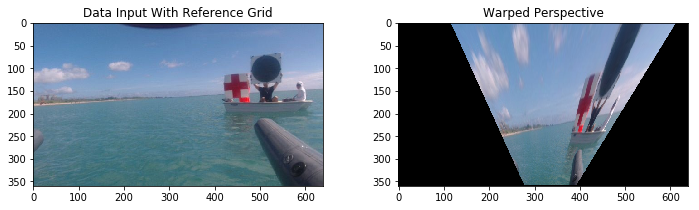

In [65]:
image = cv2.imread('images/511.jpg')
image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#set offset
dst_size = 40
bottom_offset = 6

#set transform range
source = np.float32([[20, 350], [450 ,350],[375, 205], [125, 205]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

#Transorm
warped, mask = perspect_transform(image_plot, source, destination)

#Plot
fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.title('Data Input With Reference Grid')
plt.imshow(image_plot)
plt.subplot(122)
plt.title('Warped Perspective')
plt.imshow(warped)

In [133]:
def color_recognition_mask_blue(image):
    
    lower_blue = np.array([120.2, 80.025, 60.0])
    upper_blue = np.array([152.2, 140, 100.0])

    mask = cv2.inRange(image, lower_blue, upper_blue)
    
    return mask

def color_picker(image, x, y):
    return (image[y, x, 0], image[y, x, 1], image[y, x, 2])

def hsv_to_python(h, s, v):
    h = float(h)
    s = float(s)
    v = float(v)
    return(h/2, s/100*255, v/100*255)

a = color_picker(image_plot, 100,300)
print(a)
print(hsv_to_python(190.4, 25.5, 40))

(76, 119, 128)
(95.2, 65.025, 102.0)


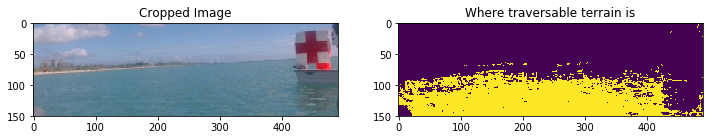

In [138]:
cropped_image = image[100:250, 0:490]
cropped_image_plot = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
blue_mask = color_recognition_mask_blue(cropped_image)

fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.title('Cropped Image')
plt.imshow(cropped_image_plot)
plt.subplot(122)
plt.title('Where traversable terrain is')
plt.imshow(blue_mask)

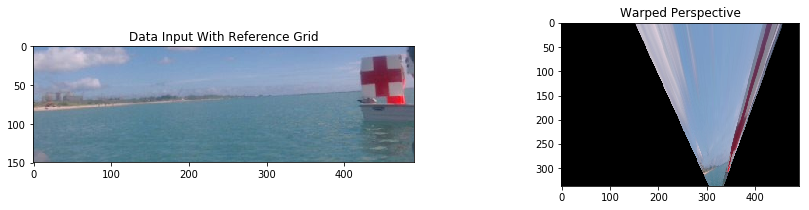

In [225]:
dst_size = 5
bottom_offset = 0

#set transform range
source = np.float32([[20, 350], [450 ,350],[375, 205], [125, 205]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], int(img.shape[0]*2.25)))# Scale y portion of image
    mask = cv2.warpPerspective(np.ones_like(img[:,:,0]), M, (img.shape[1], img.shape[0]))
    
    return warped, mask

warped, mask = perspect_transform(cropped_image_plot, source, destination)

#Plot
fig = plt.figure(figsize=(15,3))
plt.subplot(121)
plt.title('Data Input With Reference Grid')
plt.imshow(cropped_image_plot)
plt.subplot(122)
plt.title('Warped Perspective')
plt.imshow(warped)

9.294906343954002


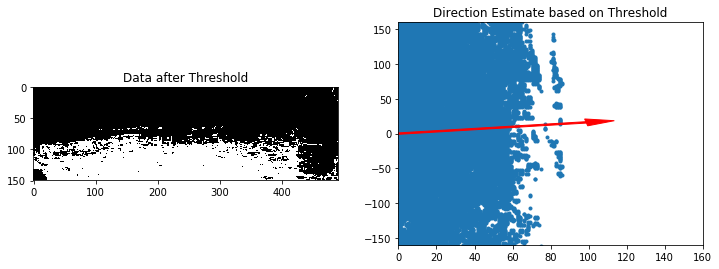

In [185]:
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel


def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles


def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated

def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated



def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Perform rotation, translation and clipping all at once
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world


image = cv2.imread('images/511.jpg')
cropped_image = image[100:250, 0:490]
cropped_image_plot = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
blue_mask = color_recognition_mask_blue(cropped_image)

warped, mask = perspect_transform(cropped_image_plot, source, destination)
threshed = color_recognition_mask_blue(cropped_image)

# Calculate pixel values in rover-centric coords and distance/angle to all pixels
xpix, ypix = rover_coords(threshed)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)
print(mean_dir*360/2/np.pi)

# Plot
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.title('Data after Threshold')
plt.imshow(threshed, cmap='gray')
plt.subplot(222)
plt.title('Direction Estimate based on Threshold')
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(mean_dir)
y_arrow = arrow_length * np.sin(mean_dir)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)

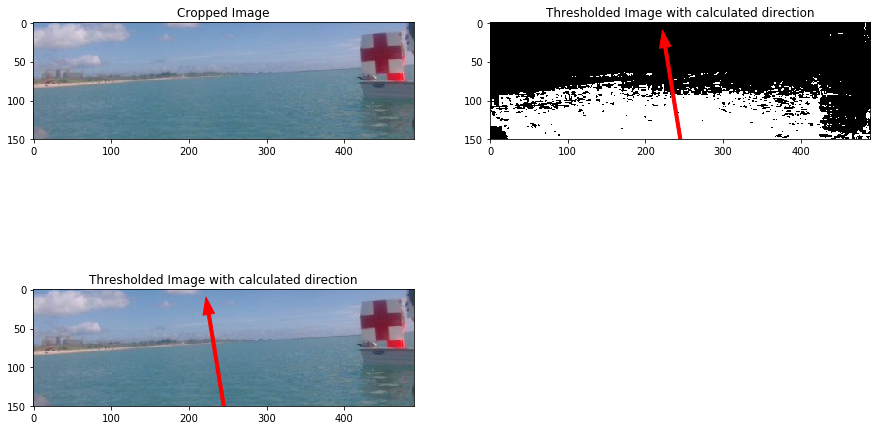

In [188]:
fig = plt.figure(figsize=(15,9))
plt.subplot(221)
plt.title('Cropped Image')
plt.imshow(cropped_image_plot, cmap='gray')
plt.subplot(222)
plt.title('Thresholded Image with calculated direction')
plt.imshow(threshed, cmap='gray')

# mean_dir = 0.15708
mean_dir = mean_dir+90/360*2*np.pi

arrow_length = 120
x_arrow = arrow_length * np.sin(mean_dir)
y_arrow = arrow_length * np.cos(mean_dir)
if mean_dir > 0:
    x_arrow = -1 * x_arrow
    y_arrow = -1 * y_arrow
plt.arrow(threshed.shape[1]/2, threshed.shape[0], x_arrow, y_arrow, color='red', zorder=2, head_width=15, width=4)

plt.subplot(223)
plt.title('Thresholded Image with calculated direction')
plt.imshow(cropped_image_plot, cmap='gray')
plt.arrow(threshed.shape[1]/2, threshed.shape[0], x_arrow, y_arrow, color='red', zorder=2, head_width=15, width=4)